In [1]:
import math
import io
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import ctypes
from ctypes import *

from PIL import Image
from torch.profiler import profile, record_function, ProfilerActivity
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.transforms import ToPILImage, ToTensor
from pytorch_msssim import ms_ssim
from compressai.zoo import bmshj2018_factorized

In [2]:
img_name = "./dataset/STO_GE_2_resized.png"

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
stream = torch.cuda.Stream()

In [4]:
net = bmshj2018_factorized(quality=1, pretrained=True).eval().to(device)

In [5]:
img = Image.open('/home/bozhan/repo/mscompression_official/dataset/STO_GE_2_resized.png').convert('RGB')
img = transforms.ToTensor()(img).unsqueeze(0).to(device)

print(img[0][0][0])

print(img.size())

# img = torch.load(f'./dataset/{pure_img_name}.pt').to(device)

y = net.g_a(img)
y_strings = net.entropy_bottleneck.compress(y)

shape = y.size()[-2:]

tmp = y.int()
tmp = tmp.float()

y_hat = net.entropy_bottleneck.decompress(y_strings, shape)
x_hat = net.g_s(tmp)

img = ToPILImage()(x_hat.clamp_(0, 1).squeeze())

tensor([0.0039, 0.0000, 0.0078,  ..., 0.0745, 0.0353, 0.0353], device='cuda:0')
torch.Size([1, 3, 2000, 2000])


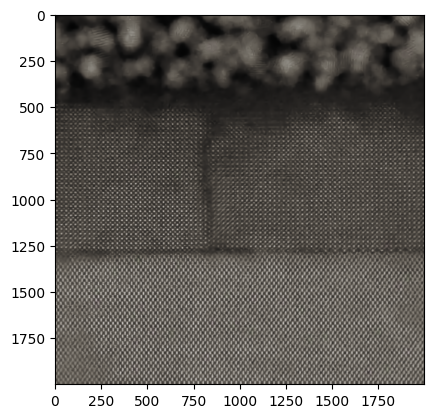

In [6]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [7]:
print(img.size)

(2000, 2000)


In [8]:
print(y.size())

torch.Size([1, 192, 125, 125])


In [9]:
print(y_hat.size())

torch.Size([1, 192, 125, 125])


In [10]:
# 24 0 20

print(y[0][24][0][20])

tensor(1.6724, device='cuda:0', grad_fn=<SelectBackward0>)


In [11]:
print(x_hat[0][0][0][0])

tensor(0.0504, device='cuda:0', grad_fn=<SelectBackward0>)


In [12]:
print(y_hat[0][0][0][0])

tensor(0.0019, device='cuda:0')


In [13]:
print(tmp[0][24][0][20])

tensor(1., device='cuda:0')


In [14]:
print(x_hat[0][0][0][0])

tensor(0.0504, device='cuda:0', grad_fn=<SelectBackward0>)


In [16]:
print(tmp.size())

torch.Size([1, 192, 125, 125])


In [18]:
print(tmp[0][24][0][105])

tensor(-1., device='cuda:0')
